<a href="https://colab.research.google.com/github/MaxEV2003/Examen1/blob/main/Examen1_valores_nulos_outliers_consumer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importamos librerias requeridas para que el código funcione
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo .xlsx sin indice
from google.colab import files 
files.upload()

In [ ]:
#Carga desde un archivo .xlsx sin indice 
consumer=pd.read_excel("consumer_mit_lift_lab.xlsx") 

In [ ]:
#Verificamos información del DataFrame
consumer.info() 

In [ ]:
#Carga desde archivo excel sin indice
data=pd.read_excel("consumer_mit_lift_lab.xlsx")
data.head() 

In [ ]:
#Corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos 

In [ ]:
#Realizamos una copia del dataframe
data2=data.copy()

**Quitar valores nulos**

In [ ]:
#Tercer método de sustitución de valores nulos
#Sustituir valores nulos por un string en concreto 
data2["300_did_not_find"]=data2["300_did_not_find"].fillna("x_producto")
data2 

In [ ]:
#Corroboramos valores nulos
valores_nulos=data2.isnull().sum()
valores_nulos 

In [ ]:
#Se usa el mismo tipo de método para quitar valores nulos en todos los que lo necesitan 
data2["284_additional_products_store"]=data2["284_additional_products_store"].fillna("284_additional_products_store")
data2 

In [ ]:
#Corroboramos valores nulos
valores_nulos=data2.isnull().sum()
valores_nulos

In [ ]:
#Sexto método de sustitución de valores nulos
#Filtro por columnas
data2["305_electricity_bill_store"]=data2["305_electricity_bill_store"].fillna(method="bfill")
data2

In [ ]:
#Corroboramos valores nulos
valores_nulos=data2.isnull().sum()
valores_nulos

In [ ]:
#Mismo método que la línea 13 y 15
data2["306_water_bill_store"]=data2["306_water_bill_store"].fillna("306_water_bill_store")
data2

In [ ]:
#Corroboramos valores nulos
valores_nulos=data2.isnull().sum()
valores_nulos

In [ ]:
#Método de sustitución de valores nulos
#Sustituir valores nulos por valores no nulos hacia atras "backward fill"("bfill")
data2["307_gas_bill_store"]=data2["307_gas_bill_store"].fillna(method="bfill")
data2

In [ ]:
#Corroboramos valores nulos
valores_nulos=data2.isnull().sum()
valores_nulos

In [ ]:
#Método de sustitución de valores nulos
#Sustituir valores nulos por un valor numérico o string en concreto
data2["308_topups_in_store"]=data2["308_topups_in_store"].fillna("308_topups_in_store")
data2

In [ ]:
#Corroboramos valores nulos
valores_nulos=data2.isnull().sum()
valores_nulos

In [ ]:
#Método de sustitución de valores nulos
#Sustituir valores nulos por valores no nulos hacia atras "backward fill"("bfill")
data2["309_wiretransfers_in_store"]=data2["309_wiretransfers_in_store"].fillna(method="bfill")
data2

In [ ]:
#Corroboramos valores nulos
valores_nulos=data2.isnull().sum()
valores_nulos

In [ ]:
#Método de sustitución de valores nulos
data2["304_additional_services_store"]=data2["304_additional_services_store"].fillna("304_additional_services_store")
data2

In [ ]:
#Corroboramos valores nulos
valores_nulos=data2.isnull().sum()
valores_nulos

In [ ]:
#Método de sustitución de valores nulos
data2["storefront_picture_just_once_if_possible"]=data2["storefront_picture_just_once_if_possible"].fillna(method="bfill")
data2

In [ ]:
#Corroboramos valores nulos
valores_nulos=data2.isnull().sum()
valores_nulos 

In [ ]:
#Corroboramos valores nulos
valores_nulos=data2.isnull().sum().sum()
valores_nulos 

**Procedimiento "Cuantiles" para sustituir outliers en dataframe**

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig=plt.figure(figsize=(15,8)) 
data2.plot(kind="box",vert=False) 
plt.title("Valores atípicos del DataFrame") 
plt.show()

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75 
y=data2["241_age_of_the_interviewee"] 
percentile25=y.quantile(0.25) 
percentile75=y.quantile(0.75)
iqr=percentile75 - percentile25 
Limite_Superior_iqr=percentile75+1.5*iqr 
Limite_Inferior_iqr=percentile25-1.5*iqr 
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite interior permitido", Limite_Inferior_iqr) 

In [ ]:
#Encontramos outliers del dataframe
outliers_iqr=data2[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr 

In [ ]:
#Obtenemos datos limpios del DataFrame
data3_iqr=data2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig=plt.figure(figsize=(5,3)) 
plt.boxplot(data3_iqr["241_age_of_the_interviewee"]) 
plt.title("Valores atípicos de la edad de los entrevistados") 
plt.show()

In [ ]:
#Realizamos una copia del dataframe
consumer=data3_iqr.copy()

Se hace el mismo procedimiento para todas las columnas con datos atípicos 

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75 
y=data2["84_willingness_sameday_delivery"]
percentile25=y.quantile(0.25)
percentile75=y.quantile(0.75)
iqr=percentile75 - percentile25

Limite_Superior_iqr=percentile75+1.5*iqr
Limite_Inferior_iqr=percentile25-1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite interior permitido", Limite_Inferior_iqr)

Limite superior permitido 231.25
Limite interior permitido -118.75


In [ ]:
#Encontramos outliers del dataframe
outliers_iqr=data2[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios del DataFrame
data3_iqr=data2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig=plt.figure(figsize=(5,3))
plt.boxplot(data3_iqr["84_willingness_sameday_delivery"])
plt.title("Valores atípicos del DataFrame")
plt.show() #dibujamos el diagrama

In [ ]:
#Realizamos una copia del dataframe
consumer=data3_iqr.copy()

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75 
y=data2["83_willingness_ultrafast_delivery"]
percentile25=y.quantile(0.25)
percentile75=y.quantile(0.75)
iqr=percentile75 - percentile25

Limite_Superior_iqr=percentile75+1.5*iqr
Limite_Inferior_iqr=percentile25-1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite interior permitido", Limite_Inferior_iqr)

Limite superior permitido 102.5
Limite interior permitido -37.5


In [ ]:
#Encontramos outliers del dataframe
outliers_iqr=data2[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios del DataFrame
data3_iqr=data2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig=plt.figure(figsize=(5,3))
plt.boxplot(data3_iqr["83_willingness_ultrafast_delivery"])
plt.title("Valores atípicos del DataFrame")
plt.show() #dibujamos el diagrama

In [ ]:
#Realizamos una copia del dataframe
consumer=data3_iqr.copy()

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75 
y=data2["289_number_whatsapp_purchases_month"]
percentile25=y.quantile(0.25)
percentile75=y.quantile(0.75)
iqr=percentile75 - percentile25

Limite_Superior_iqr=percentile75+1.5*iqr
Limite_Inferior_iqr=percentile25-1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite interior permitido", Limite_Inferior_iqr)

Limite superior permitido 2.5
Limite interior permitido -1.5


In [ ]:
#Encontramos outliers del dataframe
outliers_iqr=data2[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios del DataFrame
data3_iqr=data2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig=plt.figure(figsize=(5,3))
plt.boxplot(data3_iqr["289_number_whatsapp_purchases_month"])
plt.title("Valores atípicos del DataFrame")
plt.show() #dibujamos el diagrama

In [ ]:
#Realizamos una copia del dataframe
consumer=data3_iqr.copy()

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75 
y=data2["288_number_app_purchases_month"]
percentile25=y.quantile(0.25)
percentile75=y.quantile(0.75)
iqr=percentile75 - percentile25

Limite_Superior_iqr=percentile75+1.5*iqr
Limite_Inferior_iqr=percentile25-1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite interior permitido", Limite_Inferior_iqr)

Limite superior permitido 12.5
Limite interior permitido -7.5


In [ ]:
#Encontramos outliers del dataframe
outliers_iqr=data2[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios del DataFrame
data3_iqr=data2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

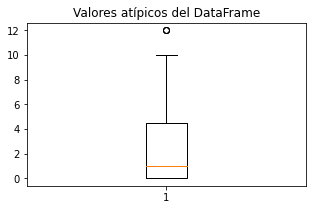

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig=plt.figure(figsize=(5,3))
plt.boxplot(data3_iqr["288_number_app_purchases_month"])
plt.title("Valores atípicos del DataFrame")
plt.show() #dibujamos el diagrama

In [ ]:
#Realizamos una copia del dataframe
consumer=data3_iqr.copy()

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75 
y=data2["81_number_online_purchases_month"]
percentile25=y.quantile(0.25)
percentile75=y.quantile(0.75)
iqr=percentile75 - percentile25

Limite_Superior_iqr=percentile75+1.5*iqr
Limite_Inferior_iqr=percentile25-1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite interior permitido", Limite_Inferior_iqr)

Limite superior permitido 6.0
Limite interior permitido -2.0


In [ ]:
#Encontramos outliers del dataframe
outliers_iqr=data2[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios del DataFrame
data3_iqr=data2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

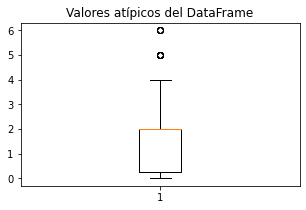

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig=plt.figure(figsize=(5,3))
plt.boxplot(data3_iqr["81_number_online_purchases_month"])
plt.title("Valores atípicos del DataFrame")
plt.show() #dibujamos el diagrama

In [ ]:
#Realizamos una copia del dataframe
consumer=data3_iqr.copy()

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75 
y=data2["238_frequency_buying_store"]
percentile25=y.quantile(0.25)
percentile75=y.quantile(0.75)
iqr=percentile75 - percentile25

Limite_Superior_iqr=percentile75+1.5*iqr
Limite_Inferior_iqr=percentile25-1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite interior permitido", Limite_Inferior_iqr)

Limite superior permitido 6.0
Limite interior permitido -2.0


In [ ]:
#Encontramos outliers del dataframe
outliers_iqr=data2[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios del DataFrame
data3_iqr=data2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig=plt.figure(figsize=(5,3))
plt.boxplot(data3_iqr["238_frequency_buying_store"])
plt.title("Valores atípicos del DataFrame")
plt.show() #dibujamos el diagrama

**Convertir DataSet sin valores nulos a CSV**

In [ ]:
#Convertir DataFrame a CSV
data3_iqr.to_csv("consumer_mit_lift_lab_limpio.csv") #una vez que se quitaron los valores nulos y los atípicos se convierte un archivo cvs

In [ ]:
#descargar archivo filtrado en csv
from google.colab import files

files.download("consumer_mit_lift_lab_limpio.csv") #se descarga el documento .csv con los datos limpio

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>